#**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 47***

---
***Full names of all students in the team: Ninad Agrawal , Aryan Saluja , Vansh Agrawal , Aditya Kumar Sharma , Ajeya Hegade K R***

---
***Id number of all students in the team: 2021A7PS2948H , 2021A7PS2947H , 2021A7PS2998H , 2021A7PS3112H , 2021A8PS3197H***


In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


#  **_1. Preprocessing of Dataset_**

## Importing the Libraries

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2

## Loading the Dataset and Data Understanding

In [232]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Economic_Growth_Trend1.csv')

In [233]:
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,customer classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


### Taking care of NULL or Missing Data Entries
<li> The two below code blocks are able to covey that the given dataset does not have any missing or null values anywhere and therefore we don't need to take care of missing data entries or null values

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Status of existing checking account                         1000 non-null   object
 1    Duration in month                                          1000 non-null   int64 
 2    Credit history                                             1000 non-null   object
 3    Purpose                                                    1000 non-null   object
 4    Credit amount                                              1000 non-null   int64 
 5    Savings account/bonds                                      1000 non-null   object
 6    Present employment since                                   1000 non-null   object
 7    Installment rate in percentage of disposable income        1000 non-null   int64 
 8    Personal

In [235]:
df.isnull().describe()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,customer classification
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [236]:
df.describe(include='all')

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,customer classification
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


### We need to see for every column in the dataset to check the number of unique keys for each feature

In [237]:
unique_counts = df.nunique()
unique_counts

Status of existing checking account                             4
 Duration in month                                             33
 Credit history                                                 5
 Purpose                                                       10
 Credit amount                                                921
 Savings account/bonds                                          5
 Present employment since                                       5
 Installment rate in percentage of disposable income            4
 Personal status and sex                                        4
 Other debtors / guarantors                                     3
 Present residence since                                        4
 Property                                                       4
 Age in years                                                  53
 Other installment plans                                        3
 Housing                                                        3
 Number of

### The list of categorical features

In [238]:
categorical_features = df.select_dtypes(include= [ 'O']).columns
categorical_features

Index(['Status of existing checking account ', ' Credit history ', ' Purpose ',
       ' Savings account/bonds ', ' Present employment since ',
       ' Personal status and sex ', ' Other debtors / guarantors ',
       ' Property ', ' Other installment plans ', ' Housing ', ' Job ',
       ' Telephone ', ' foreign worker '],
      dtype='object')

### Label Encoding

In [239]:
df1 = df

In [240]:
from sklearn.preprocessing import LabelEncoder

In [241]:
le = LabelEncoder()

In [242]:
for cols in categorical_features:
  df1[cols] = le.fit_transform(df1[cols])

df1

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,customer classification
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,...,0,31,2,1,1,1,1,0,0,1
996,0,30,2,1,3857,0,2,4,0,0,...,1,40,2,1,1,3,1,1,0,1
997,3,12,2,4,804,0,4,4,2,0,...,2,38,2,1,1,2,1,0,0,1
998,0,45,2,4,1845,0,2,4,2,0,...,3,23,2,2,1,2,1,1,0,2


### Heatmap

<Axes: >

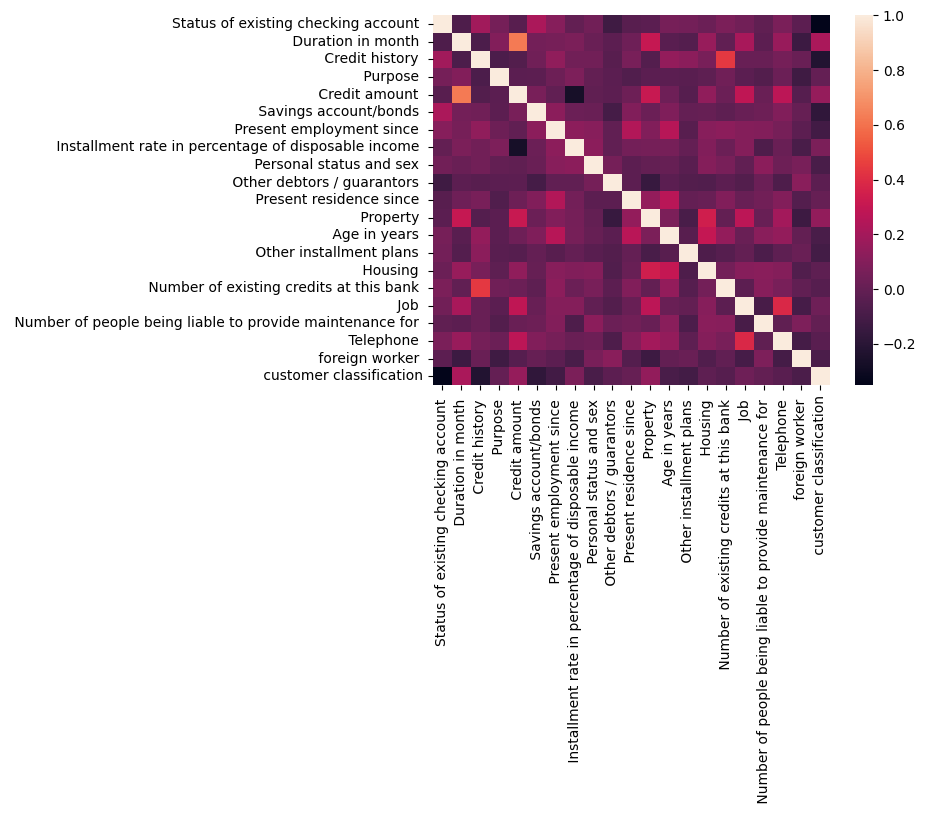

In [243]:
sns.heatmap(df1.corr() )

### Feature Engineering
From the Heatmap , we can see that Credit Amount and Duration in Months are closely / strongly related to one another, therefor we are able to derive a new feature to replace both of them
<br><br>
***credit amount per month = credit amount / duration in months***

In [244]:
df1[' Credit/Month'] = df1[' Credit amount '] / df1[' Duration in month ']

In [245]:
df1.columns

Index(['Status of existing checking account ', ' Duration in month ',
       ' Credit history ', ' Purpose ', ' Credit amount ',
       ' Savings account/bonds ', ' Present employment since ',
       ' Installment rate in percentage of disposable income ',
       ' Personal status and sex ', ' Other debtors / guarantors ',
       ' Present residence since ', ' Property ', ' Age in years ',
       ' Other installment plans ', ' Housing ',
       ' Number of existing credits at this bank ', ' Job ',
       ' Number of people being liable to provide maintenance for ',
       ' Telephone ', ' foreign worker ', ' customer classification',
       ' Credit/Month'],
      dtype='object')

In [246]:
df1.drop([' Duration in month ', ' Credit amount '] , inplace = True , axis = 1)

In [247]:
df1 = df1.reindex(['Status of existing checking account ',
       ' Credit/Month' ,' Credit history ', ' Purpose ',
       ' Savings account/bonds ', ' Present employment since ',
       ' Installment rate in percentage of disposable income ',
       ' Personal status and sex ', ' Other debtors / guarantors ',
       ' Present residence since ', ' Property ', ' Age in years ',
       ' Other installment plans ', ' Housing ',
       ' Number of existing credits at this bank ', ' Job ',
       ' Number of people being liable to provide maintenance for ',
       ' Telephone ', ' foreign worker ', ' customer classification'] , axis = 1)

### Feature Scaling

#### Only those features have been scaled that are numerical in nature , the categorical data that has been encoded has not been scaled

In [248]:
def min_max_scaling(column):
  min_val = column.min()
  max_val = column.max()
  scaled_column = (column - min_val) / (max_val - min_val)
  return scaled_column

In [249]:
df1 = df1.apply(min_max_scaling)




In [250]:
df1

,Status of existing checking account,Credit/Month,Credit history,Purpose,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,customer classification
0,0.000000,0.069461,1.00,0.444444,1.00,1.00,1.000000,0.666667,0.0,1.000000,0.000000,0.857143,1.0,0.5,0.333333,0.666667,0.0,1.0,0.0,0.0
1,0.333333,0.040642,0.50,0.444444,0.00,0.50,0.333333,0.333333,0.0,0.333333,0.000000,0.053571,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,1.0
2,1.000000,0.061259,1.00,0.777778,0.00,0.75,0.333333,0.666667,0.0,0.666667,0.000000,0.535714,1.0,0.5,0.000000,0.333333,1.0,0.0,0.0,0.0
3,0.000000,0.066546,0.50,0.333333,0.00,0.75,0.333333,0.666667,1.0,1.000000,0.333333,0.464286,1.0,1.0,0.000000,0.666667,1.0,0.0,0.0,0.0
4,0.000000,0.072749,0.75,0.000000,0.00,0.50,0.666667,0.666667,0.0,1.000000,1.000000,0.607143,1.0,1.0,0.333333,0.666667,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.049057,0.50,0.333333,0.00,0.75,0.666667,0.333333,0.0,1.000000,0.000000,0.214286,1.0,0.5,0.000000,0.333333,0.0,0.0,0.0,0.0
996,0.000000,0.042508,0.50,0.111111,0.00,0.50,1.000000,0.000000,0.0,1.000000,0.333333,0.375000,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0.0
997,1.000000,0.017467,0.50,0.444444,0.00,1.00,1.000000,0.666667,0.0,1.000000,0.666667,0.339286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0.0
998,0.000000,0.006892,0.50,0.444444,0.00,0.50,1.000000,0.666667,0.0,1.000000,1.000000,0.071429,1.0,1.0,0.000000,0.666667,0.0,1.0,0.0,1.0


### Preparing the Dataset for modelling and Splitting the Dataset into Training and Testing Set

In [251]:
X = df1.iloc[ : , : -1].values

In [252]:
X.shape

(1000, 19)

In [253]:
Y = df1.iloc[ : , -1].values

### Feature Selection

Feature Selection has been done usind the SlecectKBest and chi2 methods of feature selection which select the K best features based on the variance and co-variance of each features.

k = 14 was taken as it gave the best results with respect to the models implemented in the project

In [254]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_features = SelectKBest(chi2, k = 14)
X = chi2_features.fit_transform(X , Y)

In [255]:
X.shape

(1000, 14)

### Data Visualisation
We are now going to understand data visually, to better understand what has been presented to us

1) **Box plot**: A box plot, sometimes called a box-and-whisker plot, is a visual depiction of a dataset's distribution. It shows a set of data values summarized, with the minimum, first quartile, median, third quartile, and maximum values displayed. The "whiskers" extend to the lowest and maximum values within a given range, while the "box" represents the interquartile range (IQR) between the first and third quartiles.

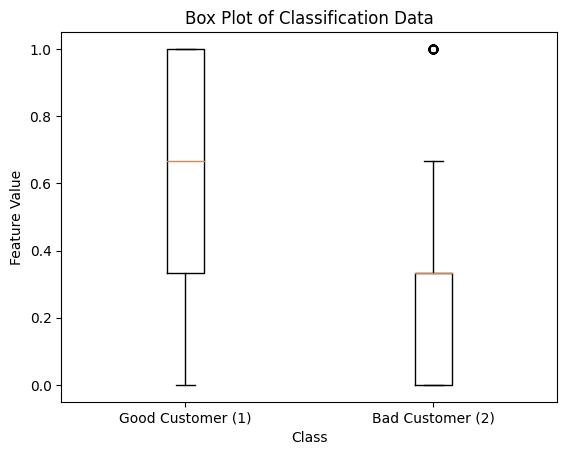

In [256]:
class_0_data = [X[i][0] for i in range(len(Y)) if Y[i] == 0]
class_1_data = [X[i][0] for i in range(len(Y)) if Y[i] == 1]

plt.boxplot([class_0_data, class_1_data], labels=['Good Customer (1)', 'Bad Customer (2)'])

plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.title('Box Plot of Classification Data')

plt.show()

2) **Histogram**: A histogram is a graphical depiction of a dataset's distribution. It shows the frequencies of various bins or categories within a dataset. The y-axis shows the frequency or count of observations falling into each category, while the x-axis shows the various categories or ranges of values.

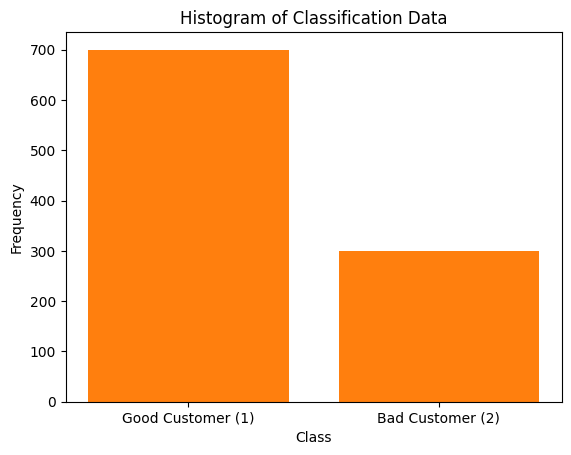

In [257]:
Y_int = np.array(Y, dtype=int)

class_counts = np.bincount(Y_int)

plt.bar(range(len(class_counts)), class_counts, tick_label=range(len(class_counts)))

class_labels = ['Good Customer (1)', 'Bad Customer (2)']
plt.bar(range(len(class_counts)), class_counts, tick_label=class_labels)

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Classification Data')

plt.show()


### Distributions of Categroical Features

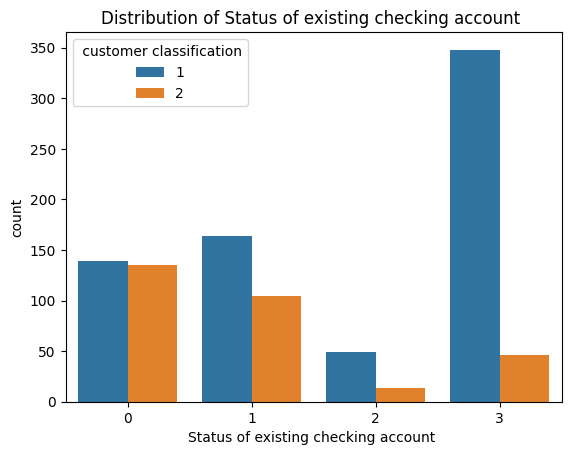

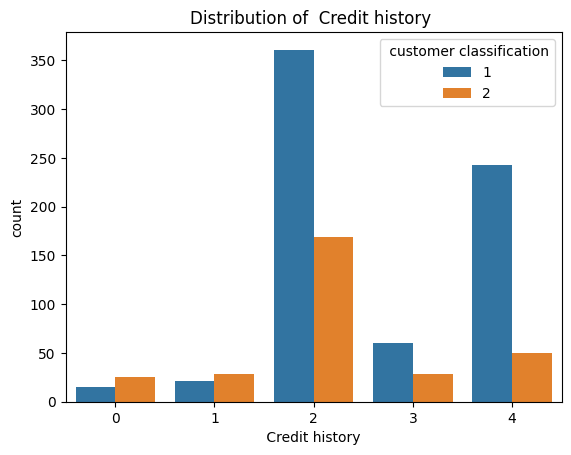

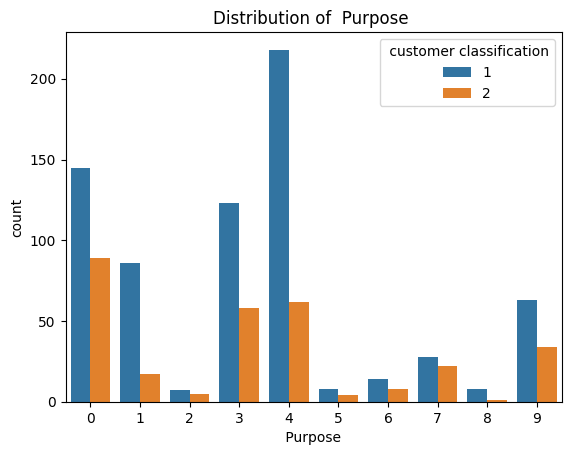

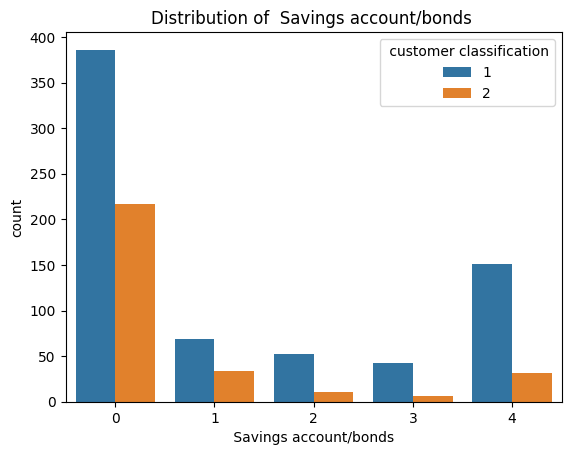

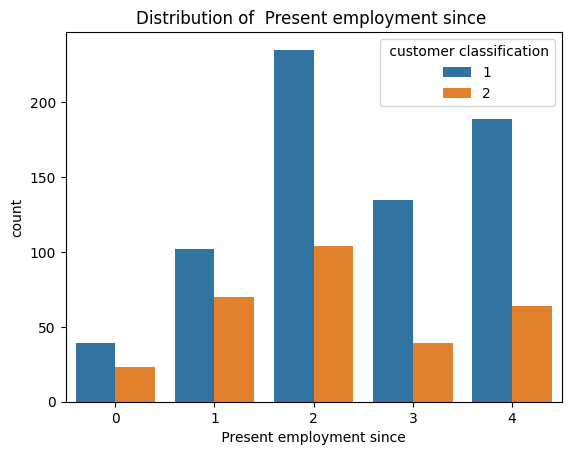

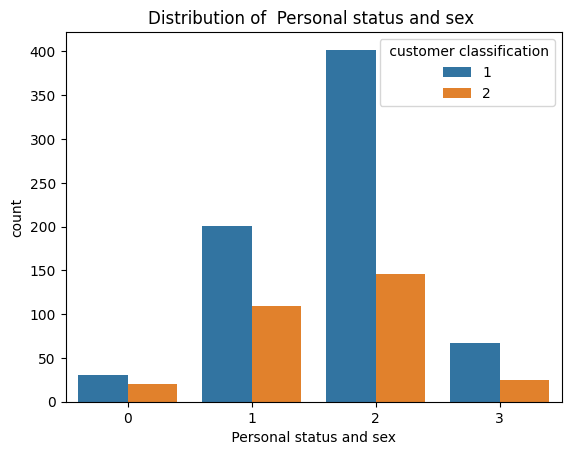

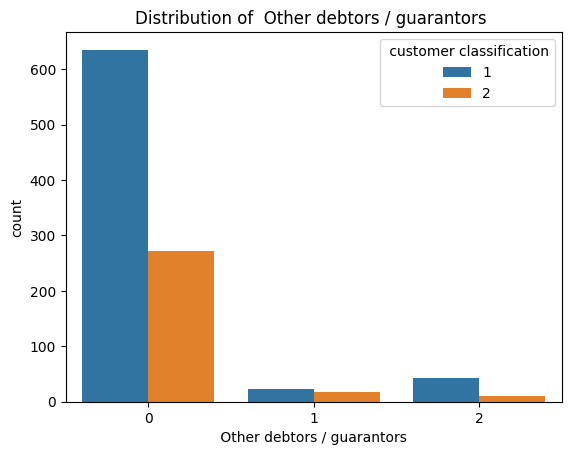

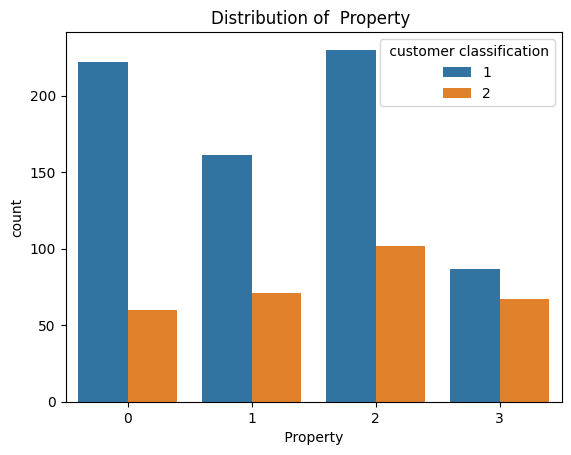

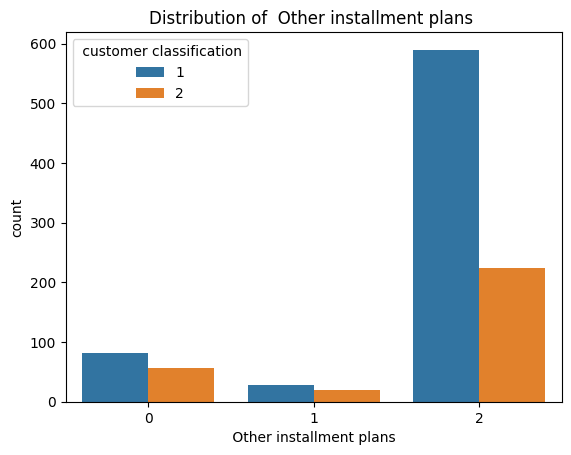

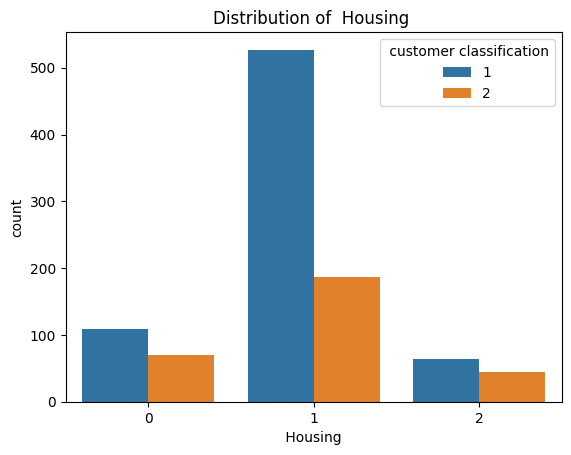

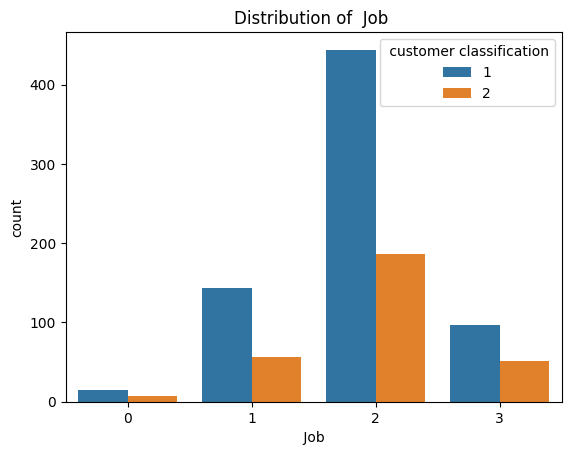

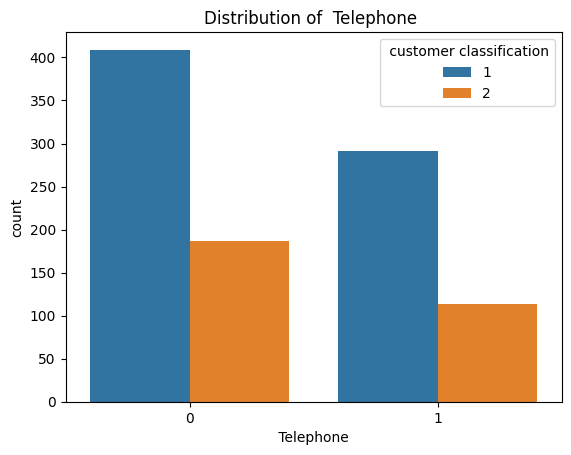

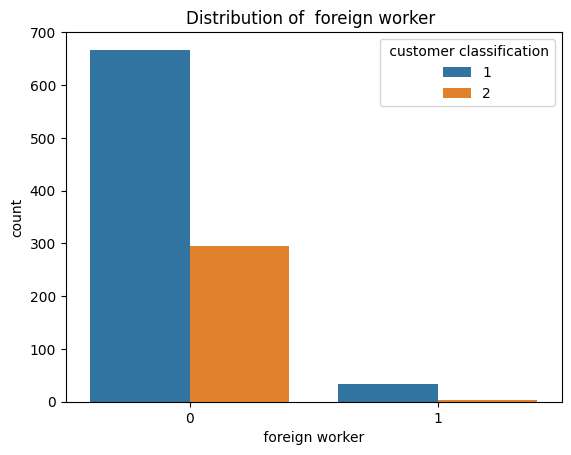

In [258]:
for cols in categorical_features :
  sns.countplot(x = cols , data = df , hue = ' customer classification')
  plt.title(f'Distribution of {cols}')
  plt.show()

## Utility Functions

### Train_Test_Split

In [259]:
def train_test_split(X, y, random_state=42, test_size=0.2):
    n_samples = X.shape[0]
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(np.arange(n_samples))
    test_size = int(n_samples * test_size)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [260]:
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , random_state=42 , test_size=0.2)

### Confusion Matrix

In [261]:
def calculate_confusion_matrix(true_labels, predicted_labels):
    unique_labels = np.unique(np.concatenate([true_labels, predicted_labels]))
    num_classes = len(unique_labels)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true_label, predicted_label in zip(true_labels.astype(int), predicted_labels.astype(int)):
        confusion_matrix[true_label, predicted_label] += 1

    return confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels, class_labels):
    sns.heatmap(calculate_confusion_matrix(true_labels, predicted_labels), annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

# ***2. ML Model 1 - KNN ( Based on Research Literature)***

In [262]:
class KNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def euclidean_distance(self, x1, x2):
        return np.linalg.norm(x1 - x2)

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        predictions = []
        for x in X:
            prediction = self._predict(x)
            predictions.append(prediction)
        return np.array(predictions)

    def _predict(self, x):
        distances = []
        for x_train in self.X_train:
            distance = self.euclidean_distance(x, x_train)
            distances.append(distance)
        distances = np.array(distances)
        n_neighbors_idxs = np.argsort(distances)[: self.n_neighbors]
        labels = self.y_train[n_neighbors_idxs]
        labels = list(labels)
        most_occuring_value = max(labels, key=labels.count)
        return most_occuring_value

In [263]:
def compute_accuracy(y_true, y_pred):
      y_true = y_true.flatten()
      total_samples = len(y_true)
      correct_predictions = np.sum(y_true == y_pred)
      return (correct_predictions / total_samples)

In [264]:
model = KNN(7)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(f" our model got accuracy score of : {compute_accuracy(Y_test , predictions)}")

 our model got accuracy score of : 0.75


# Model Assessment

1) **Confusion matrix**: Confusion matrix is a tabular representation which summarizes the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions in order to assess the effectiveness of a classification model. It offers a thorough understanding of the model's capacity to categorize instances both accurately and inaccurately.


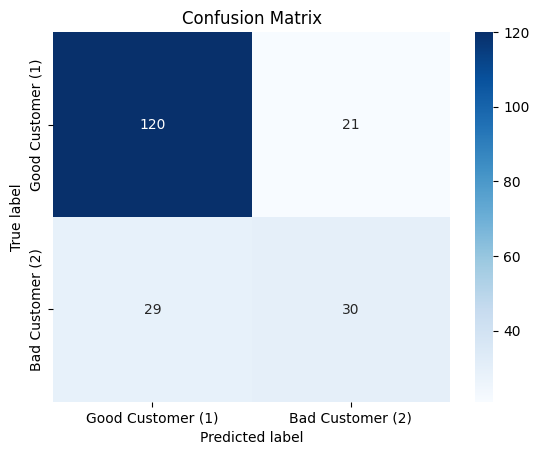

Accuracy: 75.0


In [265]:
Y_pred = model.predict(X_test)
class_labels = ['Good Customer (1)', 'Bad Customer (2)']
plot_confusion_matrix(Y_test , Y_pred , class_labels)
accuracy = np.mean(Y_test == Y_pred)
print(f'Accuracy: {accuracy * 100 }')

# ***3. ML Model 2 - Naive Bayes Classifier***



In [266]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}
        self.classes = set()

    def fit(self, X, y):
        # Calculate class probabilities
        total_samples = len(y)
        for cls in set(y):
            self.classes.add(cls)
            cls_samples = X[y == cls]
            self.class_probs[cls] = len(cls_samples) / total_samples

            # Calculate feature probabilities for each class
            self.feature_probs[cls] = {
                'mean': cls_samples.mean(axis=0),
                'std': cls_samples.std(axis=0) + 1e-10  # Adding a small constant to avoid division by zero
            }

    def _calculate_likelihood(self, x, mean, std):
        exponent = -((x - mean) ** 2) / (2 * (std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(exponent)

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []

            for cls in self.classes:
                class_prob = np.log(self.class_probs[cls])
                feature_probs = self.feature_probs[cls]
                likelihoods = np.log(self._calculate_likelihood(x, feature_probs['mean'], feature_probs['std']))
                posterior = class_prob + np.sum(likelihoods)
                posteriors.append((cls, posterior))

            predicted_class = max(posteriors, key=lambda x: x[1])[0]
            predictions.append(predicted_class)

        return predictions

In [267]:
naive_model = NaiveBayesClassifier()
naive_model.fit(X_train , Y_train)

naive_predict = naive_model.predict(X_test)
print(f'Accuracy : {np.mean(Y_test == naive_predict)}')

Accuracy : 0.71


# Model Assessment

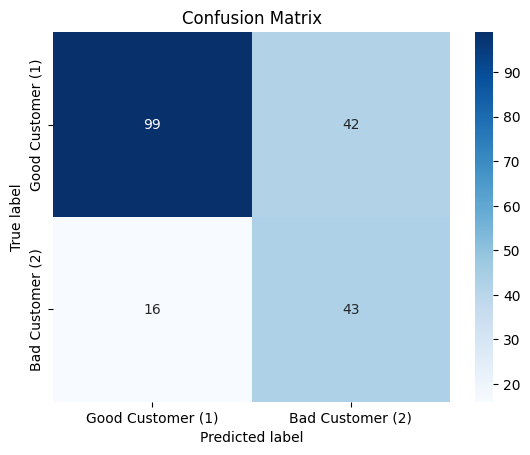

Accuracy: 71.0


In [268]:
class_labels = ['Good Customer (1)', 'Bad Customer (2)']
Y_test  =np.array(Y_test)
naive_predict = np.array(naive_predict)
plot_confusion_matrix(Y_test , naive_predict , class_labels)
accuracy = np.mean(Y_test == naive_predict)
print(f'Accuracy: {accuracy * 100 }')



# ***4. ML Model 3 - Perceptron***

In [269]:
class Perceptron:

    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

     # heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0)

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros((n_features))
        self.bias = 0
        for epoch in range(self.epochs):
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                #Updating weights and bias
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])

        return self.weights, self.bias

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)


In [270]:
perceptron_model = Perceptron(0.0005 , 1000)
perceptron_model.fit(X_train , Y_train)
perceptron_predictions = perceptron_model.predict(X_test)
print(f'Accuracy : {np.mean(Y_test == perceptron_predictions)}')


Accuracy : 0.74


# Model Assessment

1) **Confusion matrix**:

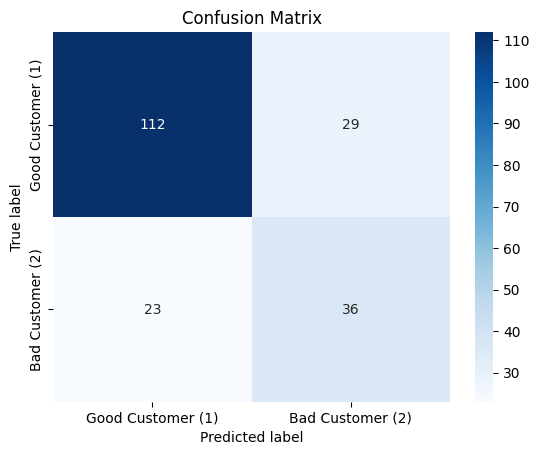

Accuracy: 74.0


In [271]:
perceptron_predictions = perceptron_model.predict(X_test)
class_labels = ['Good Customer (1)', 'Bad Customer (2)']
plot_confusion_matrix(Y_test , perceptron_predictions , class_labels)
accuracy = np.mean(Y_test == perceptron_predictions)
print(f'Accuracy: {accuracy * 100 }')

# ***5. ML Model 4 - Fischer's Linear Discriminant Analysis***

In [275]:
from sklearn.metrics import accuracy_score
class ScratchLDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.w = None

    def fit(self, X, y):
        X = pd.DataFrame(X)
        y = pd.Series(y)

        class_means = X.groupby(y).mean()
        overall_mean = X.mean()

        within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
        between_class_scatter = np.zeros((X.shape[1], X.shape[1]))

        for c in class_means.index:
            within_class_scatter += (np.cov(X[y == c], rowvar=False) * (len(X[y == c]) - 1))
            between_class_scatter += (np.outer((class_means.loc[c] - overall_mean), (class_means.loc[c] - overall_mean)) * len(X[y == c]))

        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(within_class_scatter).dot(between_class_scatter))

        indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[:, indices]

        if self.n_components is not None:
            self.w = eigenvectors[:, :self.n_components]
        else:
            self.w = eigenvectors

    def transform(self, X):
        if self.w is None:
            raise ValueError("Fit the model before transforming the data.")
        return X.dot(self.w)

def calculate_covariance_matrix(data):
    mean_vector = np.mean(data, axis=0)
    centered_data = data - mean_vector
    outer_product_sum = np.zeros((len(mean_vector), len(mean_vector)))
    for i in range(len(data)):
        outer_product_sum += np.outer(centered_data[i], centered_data[i])
    covariance_matrix = outer_product_sum / len(data)
    return covariance_matrix

def calc_threshold(X_train , Y_train) :
  X_train = pd.DataFrame(X_train)
  Y_train = pd.DataFrame(Y_train)
  Y_train.columns = ['label']
  data = pd.concat([X_train , Y_train] , axis = 1)
  class_1 = data[data['label'] == 1]
  class_0 = data[data['label']== 0]

  # Calculate class means
  class_mean_1 = class_1.drop(columns=['label'] , axis = 1).mean().values
  class_mean_0 = class_0.drop(columns=['label'] , axis = 1).mean().values

  # Calculate covariance matrix
  covariance_matrix_inv = np.linalg.inv(data.drop(columns=['label']).cov().values)
  w = np.dot(covariance_matrix_inv , ( class_mean_1 - class_mean_0))
  c = 0.5*np.dot((w.T),(class_mean_0 - class_mean_1))
  return c



# Apply LDA
lda = ScratchLDA(n_components=None)  # Use None to keep all components
lda.fit(X_train, Y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)
X_train_lda = pd.DataFrame(X_train_lda)
X_test_lda = pd.DataFrame(X_test_lda)

threshold = calc_threshold(X_train , Y_train)

y_pred_train = (X_train_lda > threshold ).astype(int).iloc[:, 0]  # Convert to Series
y_pred_test = (X_test_lda > threshold ).astype(int).iloc[:, 0]  # Convert to Series

# Calculate accuracy score
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred_test)

print(f'Training Accuracy Score: {accuracy_train:.4f}')
print(f'Testing Accuracy Score: {accuracy_test:.4f}')




Training Accuracy Score: 0.7562
Testing Accuracy Score: 0.7750


# ***Model Assessment***

1) **Confusion matrix**:

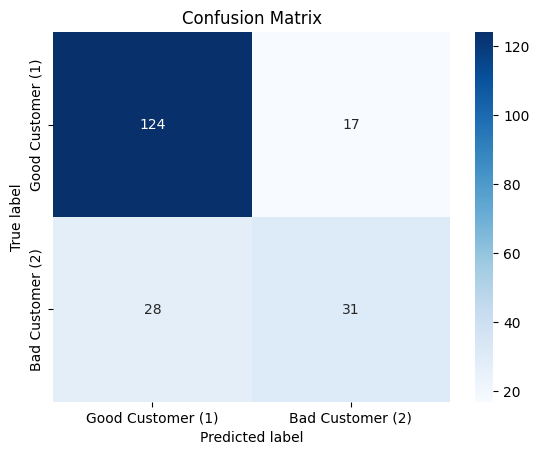

Accuracy: 77.5


In [273]:
class_labels = ['Good Customer (1)', 'Bad Customer (2)']
plot_confusion_matrix(Y_test , y_pred_test , class_labels)
accuracy = np.mean(Y_test == y_pred_test)
print(f'Accuracy: {accuracy * 100 }')

NOTE 1: We have chosen KNN as part of our algorithm to be choosen from literature. Reasoning behind it and its literature is provided below.

## Reasoning for selecting K nearest neighbours (KNN) over other algorithms:

1. Intuitive Concept:

    KNN is based on a simple and intuitive concept of proximity. Instances that are close to each other in feature space are likely to belong to the same class. This simplicity makes KNN easy to understand and implement.

2. Non-Parametric Nature:

    KNN is a non-parametric algorithm, meaning it doesn't make strong assumptions about the underlying data distribution. This flexibility allows it to adapt well to different types of datasets and decision boundaries.

3. Versatility:

    KNN is versatile and can be applied to both classification and regression tasks. Its adaptability to various types of problems makes it a suitable choice for exploratory analysis.

## Literature Review of KNN algorithm:

1.  Introduction to KNN:

    K-Nearest Neighbors (KNN) is a widely used and intuitive machine learning algorithm known for its simplicity and effectiveness. Rooted in the principle of proximity, KNN classifies or predicts based on the majority class or average of the k-nearest data points in feature space. The algorithm requires no training phase, making it appealing for exploratory analysis.

2. Foundational Texts:

    1. The Elements of Statistical Learning: Data Mining, Inference, and Prediction (Hastie, Tibshirani, & Friedman, 2009) provides a comprehensive overview of KNN, discussing its principles, applications, and considerations. The book is a foundational resource for understanding the broader landscape of statistical learning.

    2. Nearest neighbor pattern classification (Cover & Hart, 1967) introduces KNN in the context of pattern classification. The paper lays the groundwork for the algorithm, emphasizing its simplicity and effectiveness in classifying patterns based on nearest neighbors.

3.  Nonparametric Regression Techniques:

    "An introduction to kernel and nearest-neighbor nonparametric regression" (Altman, 1992) explores nonparametric regression techniques, with a focus on KNN. The paper discusses the role of distance metrics and the impact of the choice of k, providing valuable insights into the algorithm's adaptability to different scenarios.

4.  Diverse Implementation Techniques:

    "Nearest neighbor (NN) norms: NN pattern classification techniques" (Dasarathy, 1991) delves into various nearest neighbor norms and implementation techniques. It sheds light on the versatility of KNN, offering different perspectives on how the algorithm can be effectively applied in pattern classification tasks.

### Conclusion:
In conclusion, K-Nearest Neighbors stands out as a versatile and powerful algorithm with applications in both classification and regression. Its simplicity, non-parametric nature, and adaptability make it an attractive choice for exploratory analysis and scenarios where assumptions about data distribution are uncertain. The cited literature provides a rich foundation for understanding the conceptual underpinnings, historical development, and practical considerations of KNN in the field of machine learning.

# ***6. Comparison of insights drawn from the models***

Let us first discuss results of individual algorithms and then compare them.

NOTE 2: Confusion matrix is given in the order:  [True positives, false negatives, true negatives, false positives]

1) **KNN**:

> Results


1.   Accuracy: 75%
2.   Confusion Matrix: {120 , 21 ,30 , 29}

> Insights:

1. Achieved an accuracy of 75%, indicating a great overall predictive performance
2. Could serve as a baseline model, and its simplicity may make it computationally efficient.
3. It is robust to outliers, as it relies on the majority class in the neighborhood. This can be beneficial in scenarios where the data may have outliers.
4. KNN is conceptually simple, making it easy to explain and interpret. This is valuable, especially when communicating findings to non-technical stakeholders.

2) **Gaussian Naive Bayes Classifier**:

> Results


1.   Accuracy: 71%
2.   Confusion Matrix: {99,42,43,16}

> Insights:

1. Accuracy of 71%, which is pretty decent for a simple algorithm and skewed data.
2. The model has potential for interpretation due to the simplicity of the Naive Bayes algorithm.
3. Naive Bayes tends to perform well in high-dimensional spaces, making it suitable for datasets with a large number of features.
4. Naive Bayes can handle both numerical and categorical features, providing flexibility in diverse datasets.

3) **Perceptron**:

> Results


1.   Accuracy: 74%
2.   Confusion Matrix: {112, 29, 36, 23}

> Insights:

1. Achieved a respectable accuracy of 74%, contributing to the overall model performance.
2. Simplicity and speed of the Perceptron make it suitable for quick predictions.
3. The Perceptron creates linear decision boundaries, which can work well when the underlying patterns in the data are linear.
4. The Perceptron is capable of online learning, making it adaptable to streaming data and dynamic environments.

4) **Fisher's Linear Discriminant Analysis**:

> Results


1.   Accuracy: 77.5
2.   Confusion Matrix: {124, 17, 31, 28}

> Insights:

1. Achieved a brillian accuracy of 77.5%, which is highest among all.
2. It is great at avoiding false negatives, which is lowest among all.
3. Originally designed for binary classification, Fisher's LDA is particularly effective when dealing with two classes, providing a straightforward solution for linear separation, which is great for our data.
4. Widely applied in pattern recognition, Fisher's LDA has been successfully used in various fields, including image and speech recognition, bioinformatics, and finance.

NOTE 3: In the insights section for each algorithm the first 2 points cover the interpretation of results and the next 2 points cover the domains and kind of data where these algorithms are most useful for. This information is useful to decide the algorithm based on our need and given data.

# Final Insights

1. Overall Model Performance:

  All models, including KNN, Gaussian Naive Bayes,Fischer's Linear Discriminant Analysis and Perceptron, demonstrated competitive accuracies ranging from 71% to 78%.

2. Among the evaluated algorithms,Gaussian Navie Bayes Classifier stands out for its relatively effective management of false positives.

3. Among these algorithms Fisher's LDA stands out of the rest for managing false negatives, making it a safe algorithm.

4. Strengths and Considerations:

  2.1) KNN:

  Achieved the great accuracy (75%) and demonstrated a strong true positive rate. Demonstrated a robust true positive rate, suggesting an ability to correctly identify instances of positive class (creditworthiness).

  2.2) Perceptron:

  Showcased a balanced accuracy of 74%, indicating a good equilibrium between correctly identifying both positive and negative instances.

  2.3) Naive Bayes:

  KNN achieved a commendable accuracy of 71%, indicating its ability to make correct predictions. The competitive true positive rate suggests that the model performs well in identifying instances of "bad" customers.

  2.4) Fisher's Linear Discriminant Analysis:

  Achieved the highest accuracy of 77.5% which is the highest among all algorithms making it the most suitable for our situation and our data.

5. Ultimately each algorithm has its own strengths, and are preferred in various situations. The choice of algorithm depends on the situation and the data.

# Real World Impact

###Contribution to Sustainable Development Goals (SDGs):
This project is aligned with the United Nations Sustainable Development Goals (SDGs), specifically targeting goals that emphasize economic development, stability, and the responsible use of data. The insights derived from the analysis of historical economic growth trends using the German Credit Data dataset contribute to several SDGs:

1. SDG 8: Decent Work and Economic Growth:

  By identifying factors influencing economic growth, the project aligns with SDG 8's aim of promoting sustained, inclusive, and sustainable economic growth, full and productive employment, and decent work for all.

2. SDG 9: Industry, Innovation, and Infrastructure:

  The project's focus on historical economic trends and credit data contributes to fostering innovation in economic analysis and infrastructure development. It supports SDG 9's objective of building resilient infrastructure, promoting inclusive and sustainable industrialization, and fostering innovation.

3. SDG 11: Sustainable Cities and Communities:

  The project's insights can indirectly impact urban and rural communities by informing economic policies and strategies that contribute to sustainable development, aligning with SDG 11's goal of creating inclusive, safe, resilient, and sustainable cities.

By contributing to these Sustainable Development Goals, the project underscores its commitment to utilizing data analysis for the betterment of society and the environment. The insights gained have the potential to drive positive change and contribute to a more sustainable and inclusive global economy.

# **_7. References_**

1.   SDG 8: Decent Work and Economic Growth:

      United Nations. (2015). Sustainable Development Goal 8: Decent Work and Economic Growth. Link: https://sdgs.un.org/goals/goal8

2.   SDG 9: Industry, Innovation, and Infrastructure:

      United Nations. (2015). Sustainable Development Goal 9: Industry, Innovation, and Infrastructure. Link: https://sdgs.un.org/goals/goal9

3.   SDG 11: Sustainable Cities and Communities:

      United Nations. (2015). Sustainable Development Goal 11: Sustainable Cities and Communities. Link: https://sdgs.un.org/goals/goal11

4.   KNN (K-Nearest Neighbors):

      1. Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer. Link: https://hastie.su.domains/ElemStatLearn/

      2. Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer. Link: https://link.springer.com/book/10.1007/978-0-387-84858-7

      3. Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE Transactions on Information Theory, 13(1), 21-27. Link: https://ieeexplore.ieee.org/document/1053964

      4. Altman, N. S. (1992). An introduction to kernel and nearest-neighbor nonparametric regression. The American Statistician, 46(3), 175-185. Link: https://www.jstor.org/stable/2685209

      5. Dasarathy, B. V. (1991). Nearest neighbor (NN) norms: NN pattern classification techniques. IEEE Computer Society Press. Link: https://www.scirp.org/(S(351jmbntvnsjt1aadkposzje))/reference/referencespapers.aspx?referenceid=1603039

5.   Gaussian Naive Bayes:

      Manning, C. D., Raghavan, P., & Schütze, H. (2008). Introduction to Information Retrieval. Cambridge University Press. Link: https://nlp.stanford.edu/IR-book/

6.   Perceptron:

      Rosenblatt, F. (1958). The perceptron: A probabilistic model for information storage and organization in the brain. Psychological Review, 65(6), 386–408. Link: https://psycnet.apa.org/record/1959-06811-001

7.   Fisher's Linear Discriminant Analysis:

     Fisher, R. A. (1936). "The use of multiple measurements in taxonomic problems." Annals of Eugenics, 7(2), 179-188. Link: https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x